# Проблема качества данных

1. **Загружаем [датасет](https://www.kaggle.com/datasets/hesh97/titanicdataset-traincsv) и получаем данные**

In [1]:
import pandas as pd

In [2]:
# Загрузка данных
file_path = 'C:/Users/Yaros/Downloads/train.csv'
data = pd.read_csv(file_path)

In [3]:
# Первичный осмотр данных
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


2. **Удаляем все пропущенные значения и категориальные переменные. Обучаем модель. Выбираем и считаем метрику качества.**

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# Удаление категориальных переменных и пропущенных значений
data_clean = data.select_dtypes(include=[int, float]).dropna()

In [7]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [8]:
# Выделяем целевую переменную и признаки
X = data_clean.drop('Survived', axis=1)
y = data_clean['Survived']

In [9]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Расчет точности
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7069767441860465

3. **Снова загружаем полные данные**

- В этом нет необходимости, т.к. изначальный датасет хранится в переменной data

4. **Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

In [12]:
# Удаление нерелевантных признаков
data_reduced = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [13]:
# Просмотр обновленных данных
data_reduced.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Удалены следующие признаки:**  
- **PassengerId:** Идентификатор пассажира является уникальным для каждого человека и не несет информации, влияющей на выживаемость.  
- **Name:** Имя, хотя и может содержать полезную информацию в виде титулов, в данном случае рассматривается как уникальный идентификатор, который сложно использовать в модели без дополнительной обработки.  
- **Ticket:** Номер билета является уникальным и в большинстве случаев не коррелирует напрямую с выживаемостью.  
- **Cabin:** Номер каюты имеет большое количество пропущенных значений, что делает его использование в модели затруднительным без дополнительной обработки и внесения допущений.

5. **Проверьте данные на наличие пропущенных значений.** 
    - Посчитаем, какой процент данных будет потерян, если просто удалить пропуски.  
    - Заполним пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используем подходящий метод. Можно не использовать все перечисленные методы.

In [14]:
# Проверка данных на наличие пропущенных значений
missing_values = data_reduced.isnull().sum()
total_values = data_reduced.shape[0]
percent_missing = (missing_values / total_values) * 100

# Вывод процента пропущенных значений по каждому признаку
percent_missing

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

- **Age:** Заполним средним значением, так как это непрерывная переменная.  
- **Embarked:** Заполним наиболее часто встречающимся значением, поскольку это категориальная переменная.

In [15]:
# Заполнение пропущенных значений в 'Age' средним значением
data_reduced['Age'].fillna(data_reduced['Age'].mean(), inplace=True)

# Заполнение пропущенных значений в 'Embarked' наиболее часто встречающимся значением
most_frequent_embarked = data_reduced['Embarked'].mode()[0]
data_reduced['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Проверка заполнения пропусков
data_reduced.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. **Категориальные переменные переводим в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).**

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Преобразование 'Sex' с использованием LabelEncoder
label_encoder = LabelEncoder()
data_reduced['Sex'] = label_encoder.fit_transform(data_reduced['Sex'])

In [18]:
# Преобразование 'Embarked' с использованием pd.get_dummies
embarked_dummies = pd.get_dummies(data_reduced['Embarked'], prefix='Embarked')
data_reduced = pd.concat([data_reduced, embarked_dummies], axis=1)
data_reduced.drop('Embarked', axis=1, inplace=True)

In [19]:
data_reduced.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


- Преобразуем поля 'Embarked' в целочисленные значения

In [20]:
data_reduced['Embarked_C'] = data_reduced['Embarked_C'].astype(int)
data_reduced['Embarked_Q'] = data_reduced['Embarked_Q'].astype(int)
data_reduced['Embarked_S'] = data_reduced['Embarked_S'].astype(int)

data_reduced.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


- **LabelEncoder для Sex:** Поскольку пол является бинарной переменной (мужской/женский), использование LabelEncoder является эффективным способом преобразования в числовые значения.  

- **pd.get_dummies для Embarked:** Поскольку порт посадки является мультиклассовой переменной, преобразование в индикаторные переменные с помощью pd.get_dummies позволяет избежать порядковой интерпретации и лучше отразить категориальную природу этой переменной.

7. **Проверяем данные на наличие выбросов.**  
    a) Удаляем выбросы, если считаем это целесообразным.

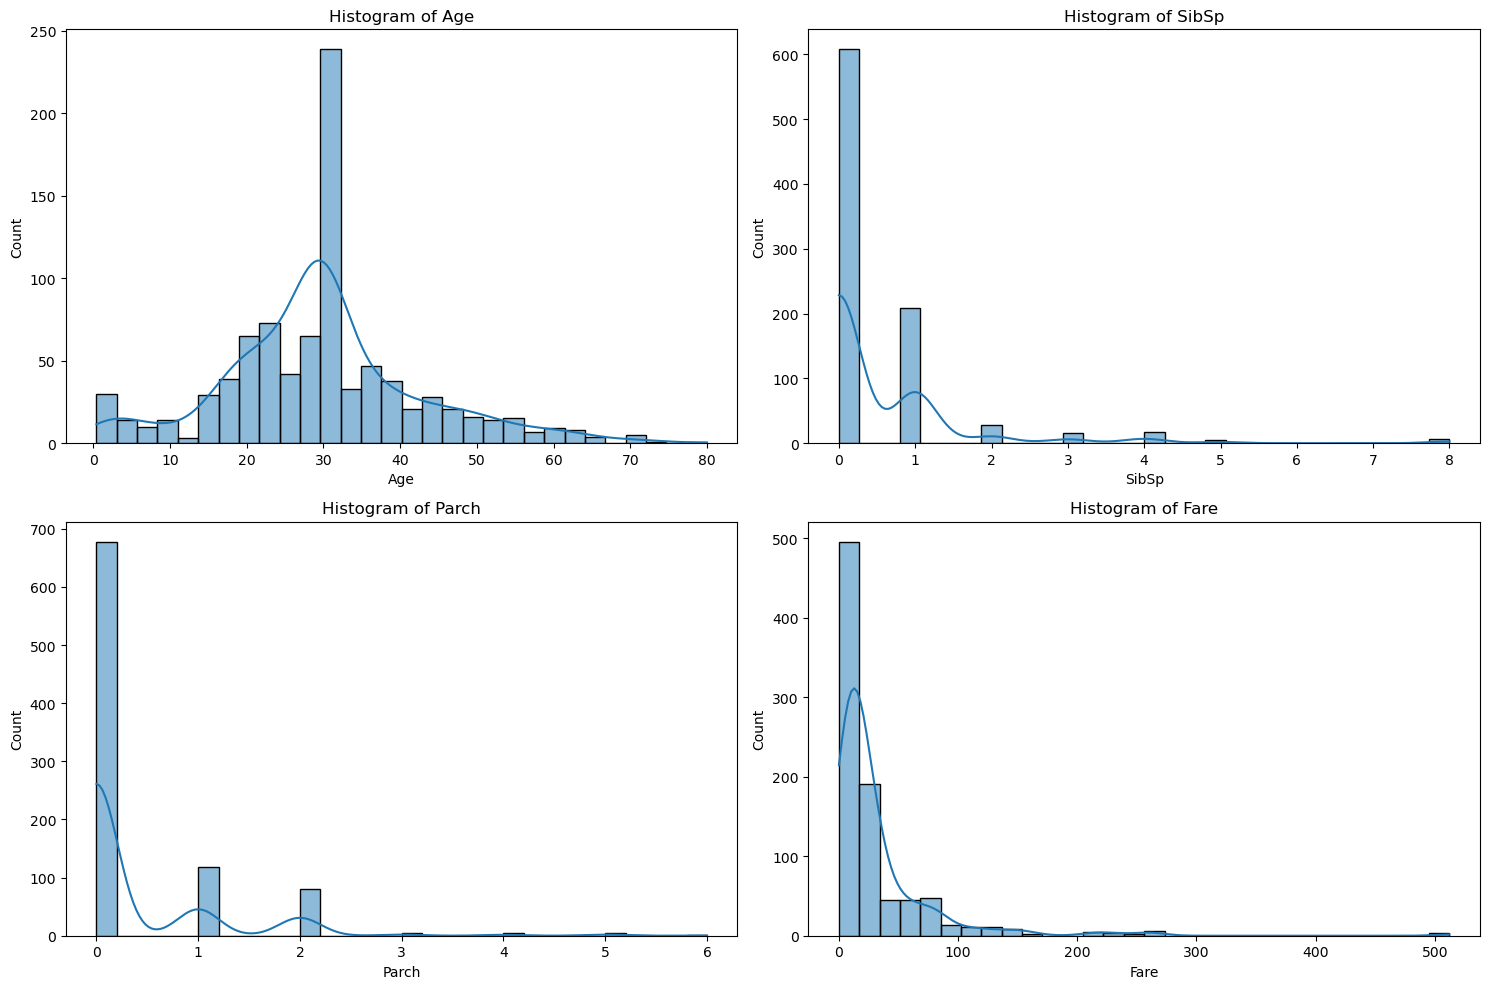

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Описательная статистика для числовых переменных
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
desc_stats = data_reduced[numerical_features].describe()

# Гистограммы для визуализации распределения
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_reduced[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')

plt.tight_layout()
plt.show()

desc_stats

- **Age (Возраст):** Распределение возраста кажется нормальным с небольшим количеством выбросов. Максимальное значение 80 лет вполне реалистично, и удаление этих данных может исказить анализ старшего возрастного сегмента.  
- **SibSp и Parch:**  Оба распределения смещены вправо, с большинством значений, сосредоточенных около нуля. Высокие значения в этих столбцах могут быть реалистичными (например, большие семьи), и их удаление может привести к потере информации о пассажирах с большим количеством родственников на борту.  
- **Fare:** Это распределение имеет явные выбросы с очень высокими значениями. Тем не менее, эти выбросы могут отражать дорогие билеты первого класса, что является важным фактором для анализа.

**Решение о стратегии обработки выбросов:**

    Учитывая важность контекста и потенциальное значение выбросов в этом датасете, удалять выбросы в Age, SibSp и Parch не будем. Эти значения могут быть важны для анализа выживаемости на "Титанике".
    Для Fare следует принять более обдуманный подход. Вместо удаления выбросов можно применить логарифмическую трансформацию, чтобы уменьшить влияние очень высоких значений, сохраняя при этом структуру данных.

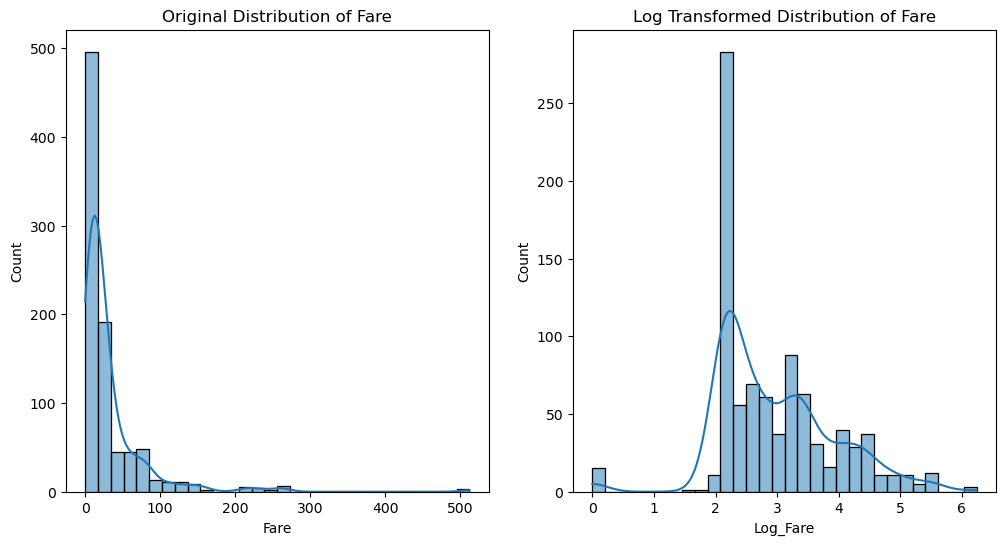

In [22]:
import numpy as np

# Применение логарифмической трансформации к 'Fare'
# Добавление небольшой константы, чтобы избежать log(0)
data_reduced['Log_Fare'] = np.log(data_reduced['Fare'] + 1)

# Визуализация измененного распределения
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_reduced['Fare'], kde=True, bins=30)
plt.title('Original Distribution of Fare')

plt.subplot(1, 2, 2)
sns.histplot(data_reduced['Log_Fare'], kde=True, bins=30)
plt.title('Log Transformed Distribution of Fare')

plt.show()

Из визуализации видно, что логарифмическая трансформация значительно улучшила распределение тарифов, делая его более нормализованным и уменьшая влияние выбросов.

8. ***Построим 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**

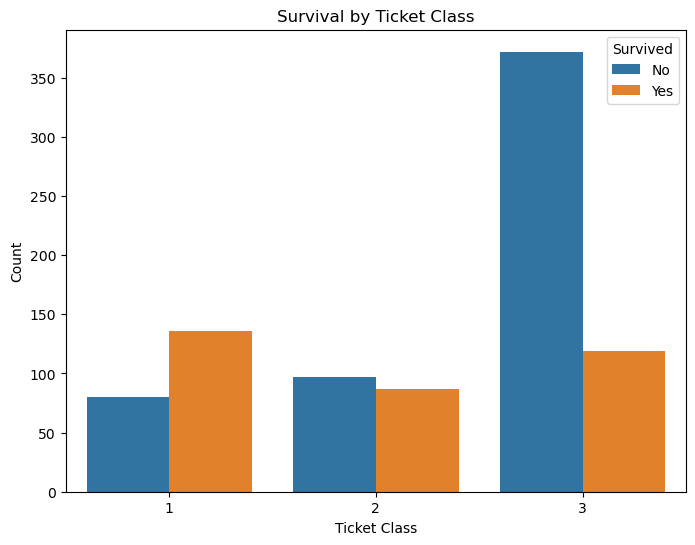

In [23]:
# График "Выживаемость в зависимости от класса билета" (Survived vs Pclass)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data_reduced)
plt.title('Survival by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

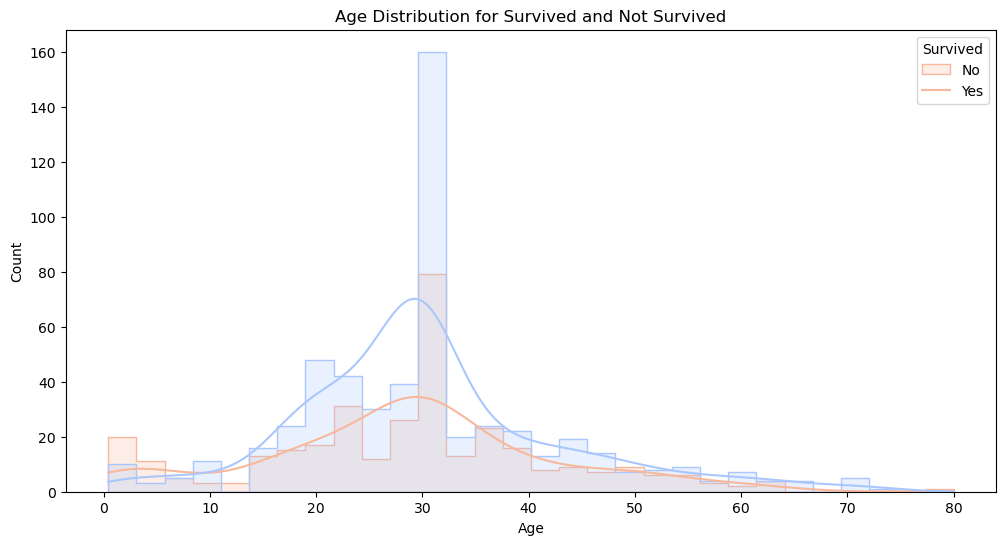

In [24]:
# График "Распределение возраста среди выживших и погибших"
plt.figure(figsize=(12, 6))
sns.histplot(data=data_reduced, x='Age', hue='Survived', kde=True, element='step', palette='coolwarm')
plt.title('Age Distribution for Survived and Not Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

    График "Выживаемость в зависимости от класса билета" подтверждает, что пассажиры первого класса имели значительно больше шансов на спасение, что может быть связано с лучшим доступом к спасательным средствам или более высоким приоритетом при эвакуации.

    График "Распределение возраста среди выживших и погибших" показывает, что возраст являлся значимым фактором в выживаемости на "Титанике". Младшие возрастные группы, вероятно, получили приоритет при спасении.

9. **Попробуем математически преобразовать признак Age.**

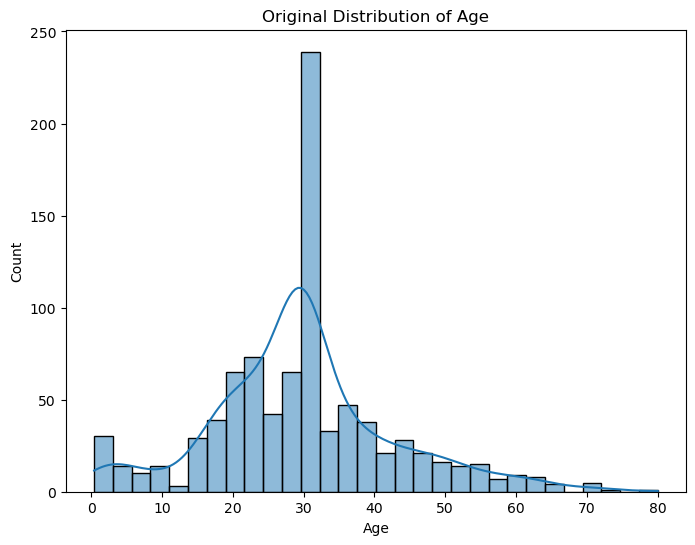

In [25]:
# Визуализация распределения возраста для определения наилучшего преобразования
plt.figure(figsize=(8, 6))
sns.histplot(data_reduced['Age'], kde=True, bins=30)
plt.title('Original Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

    Здесь Я использовал метод стандартизации, т.к. этот метод  подходит для данных с приблизительно нормальным распределением и может улучшить производительность многих алгоритмов машинного обучения. Проведем стандартизацию возраста.

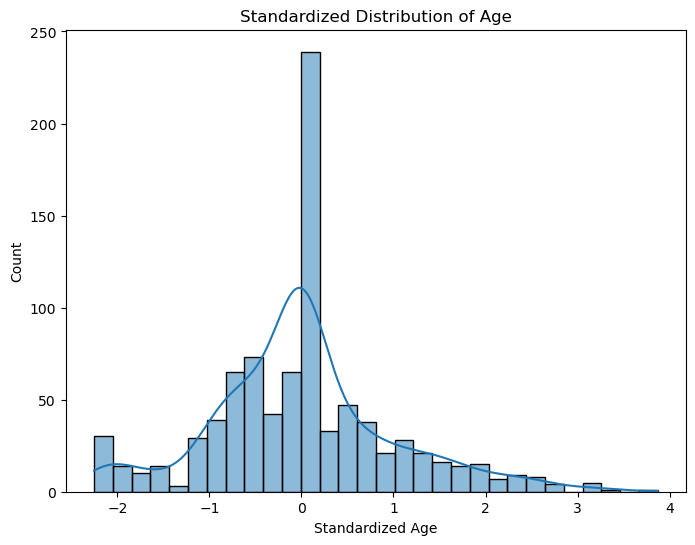

In [26]:
from sklearn.preprocessing import StandardScaler

# Инициализация стандартизатора
scaler = StandardScaler()

# Преобразование возраста
data_reduced['Age_Standardized'] = scaler.fit_transform(data_reduced[['Age']])

# Визуализация стандартизированного распределения возраста
plt.figure(figsize=(8, 6))
sns.histplot(data_reduced['Age_Standardized'], kde=True, bins=30)
plt.title('Standardized Distribution of Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

    Как видно из графика, стандартизированное распределение возраста теперь имеет среднее значение около 0 и стандартное отклонение около 1. Это преобразование делает данные более подходящими для алгоритмов машинного обучения, особенно тех, которые чувствительны к масштабу признаков.

In [27]:
# Подготовка данных
# Убедимся, что используем стандартизированный возраст и логарифмически преобразованный тариф
# Также убедимся, что не включаем оригинальные столбцы Age и Fare
X2 = data_reduced.drop(['Survived', 'Age', 'Fare'], axis=1)
X2['Age_Standardized'] = scaler.transform(data_reduced[['Age']])
X2['Log_Fare'] = np.log(data_reduced['Fare'] + 1)

y2 = data_reduced['Survived']

In [28]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,886,3,39.0,0,5,29.1250
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
889,890,1,26.0,0,0,30.0000


In [29]:
X2

,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Log_Fare,Age_Standardized
0,3,1,1,0,0,0,1,2.110213,-0.592481
1,1,0,1,0,1,0,0,4.280593,0.638789
2,3,0,0,0,0,0,1,2.188856,-0.284663
3,1,0,1,0,0,0,1,3.990834,0.407926
4,3,1,0,0,0,0,1,2.202765,0.407926
...,...,...,...,...,...,...,...,...,...
886,2,1,0,0,0,0,1,2.639057,-0.207709
887,1,0,0,0,0,0,1,3.433987,-0.823344
888,3,0,1,2,0,0,1,3.196630,0.000000
889,1,1,0,0,1,0,0,3.433987,-0.284663


In [32]:
# Разделение данных на обучающую и тестовую выборки
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train2, y_train2)

# Предсказание на тестовых данных
y_pred2 = model.predict(X_test2)

# Расчет точности
accuracy2 = accuracy_score(y_test2, y_pred2)
accuracy2

0.8097014925373134

Результат превзошёл предыдущий более чем на 10%.  
Это указывает на более хорошее качество модели для задачи классификации выживаемости на "Титанике", учитывая сложность и ограничения данных. Однако всегда есть потенциал для улучшения, например, через настройку гиперпараметров, использование более сложных моделей или дополнительный анализ и обработку признаков